# Train a Perceptron

The purpose of this notebook is to provide an example of training a perceptron with only two inputs.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Perceptron

### Create True Model and Training Data

Consider male patient data that contains information on *height* ($h$) and *weight* ($w$). Based solely on these two factors, we wish to identify whether or not a male patient is obese. (Even though would be an awful way of actually practicing medicine) 

Consider that we have the following stastics of the male USA population:

$$
w ~ N(\bar{w}, \sigma_w^2), \bar{w} = 89.8 \textrm{kg}, \sigma_w = 13 \textrm{kg}
h ~ N(\bar{h}, \sigma_h^2), \bar{h} = 1.77 \textrm{m}, \sigma_h = 0.0762 \textrm{m}
$$

To develop a model, we must pre-define a line that linearly separates the two catagories. Let's make up a model such that the slope ($m$) of our line is defined as:

$$
m = \frac{y_2 - y_1}{x_2 - x_1} = \frac{\left(\bar{h} + \frac{1}{2}\sigma_h\right) - \left(\bar{h} - \frac{1}{2}\sigma_h\right)}{\left(\bar{w} + \frac{1}{2}\sigma_w\right) - \left(\bar{w} - \frac{1}{2}\sigma_w\right)} = \frac{\sigma_h}{\sigma_w}
$$

Let's ensure that our line passes through the point $\left(\bar{w}, \bar{h}\right)$. Therefore, our line can be defined as:

$$
y - y_1 = m\left(x - x_1\right)
y - \bar{h} = \frac{\sigma_h}{\sigma_w} \left(x - \bar{w}\right)
$$

In slope-intercept form, this is:

$$
y = \frac{\sigma_h}{\sigma_w} x + \left(-\frac{\sigma_h}{\sigma_w} \bar{w} + \bar{h}\right)
$$

Re-writing this in standard form, and adding our inequality which classifies where or not a patient is obese is now defined as:

$$
-\frac{\sigma_h}{\sigma_w}x + y < \left(-\frac{\sigma_h}{\sigma_w} \bar{w} + \bar{h}\right)
$$

Substituting in our values for the male population statistics (and rounded to three decimals), our model is realized as:

$$
-0.006x + y < 1.244
$$

-0.005861538461538461
1.0
1.243633846153846


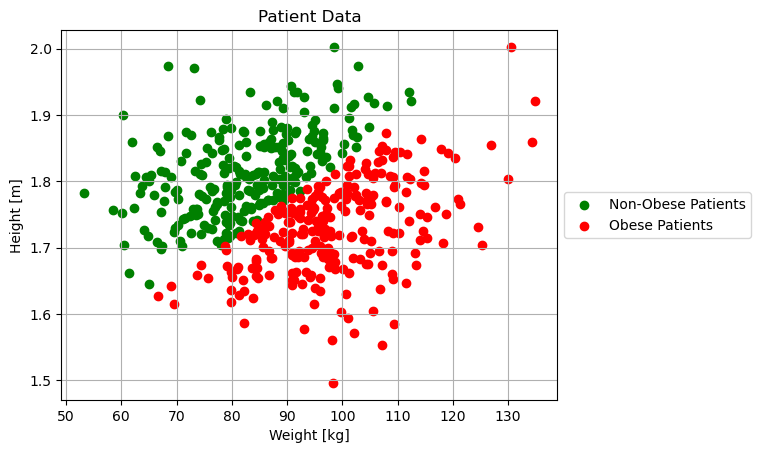

In [14]:
# Height and weight statistics of the USA in SI units (meters, kilograms)
height_mean = 1.77 
height_std = 0.0762
weight_mean = 89.8
weight_std = 13

# Create Patient Data
number_of_patients = 500
heights = height_mean + height_std * np.random.randn(number_of_patients)
weights = weight_mean + weight_std * np.random.randn(number_of_patients)

# Apply True Model
a = -(height_std/weight_std)
b = 1.0
c = (-(height_std/weight_std)*weight_mean + height_mean)
true_model = a*weights + b*heights - c
is_obese = np.zeros(number_of_patients)
for k in range(0, number_of_patients):
    if true_model[k] < 0:
        is_obese[k] = 1.0
    else:
        is_obese[k] = -1.0

print(a)
print(b)
print(c)

# Place Data in DataFrame
patient_data = pd.DataFrame({
    'Weight': weights,
    'Height': heights,
    'Is_Obese': is_obese
})

# Segregate Data for Plotting Purposes
obese_patient_data = patient_data[patient_data['Is_Obese'] == 1.0]
non_obese_patient_data = patient_data[patient_data['Is_Obese'] == -1.0]

# Plot Data
plt.scatter(non_obese_patient_data['Weight'], non_obese_patient_data['Height'], c='green', label='Non-Obese Patients')
plt.scatter(obese_patient_data['Weight'], obese_patient_data['Height'], c='red', label='Obese Patients')
plt.title("Patient Data")
plt.xlabel("Weight [kg]")
plt.ylabel("Height [m]")
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


### Train the Perceptron to Identify Obese Male Patients

Now we will create a perceptron and train it on our available data to identify obese male patients.

In [15]:
# Create a Perceptron
perceptron = Perceptron.Perceptron(2)
perceptron.learning_rate = 1e-1

# Train the Perceptron
for k in range(0, number_of_patients):
    perceptron.train(patient_data.iloc[k, [0, 1]].to_numpy(), patient_data['Is_Obese'][k])

# Cheat
perceptron.set_weights = np.array([c, a, b])

# Compare Formulated Weights
w = perceptron.get_weights()
print(f'w0: {w[0]} (expected: {c})')
print(f'w1: {w[1]} (expected: {a})')
print(f'w2: {w[2]} (expected: {b})')

w0: -1.8000000000000005 (expected: 1.243633846153846)
w1: -5.329517173873889 (expected: -0.005861538461538461)
w2: -4.3398995275133085 (expected: 1.0)


### Evaluate Perceptron Accuracy

How well did our training go?

Number of True Non-Obese Predictions: 57
Number of True Obese Predictions: 0
Number of False Positives: 0
Number of False Negatives: 43


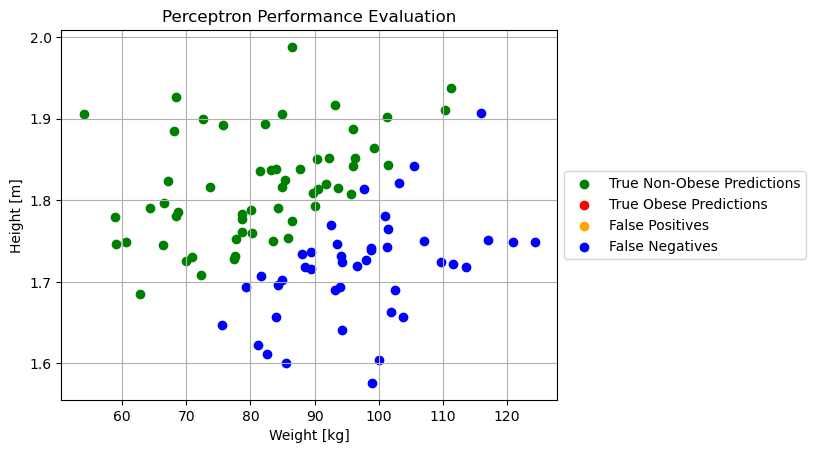

In [16]:
# Create New Patient Data
number_of_new_patients = 100
new_heights = height_mean + height_std * np.random.randn(number_of_new_patients)
new_weights = weight_mean + weight_std * np.random.randn(number_of_new_patients)

# Apply True Model
new_true_model = a*new_weights + b*new_heights - c
is_obese_new = np.zeros(number_of_new_patients)
for k in range(0, number_of_new_patients):
    if new_true_model[k] < 0:
        is_obese_new[k] = 1.0
    else:
        is_obese_new[k] = -1.0

# Allow the Perceptron to Make Predictions
perceptron_predictions = np.zeros(number_of_new_patients)
for k in range(0, number_of_new_patients):
    perceptron_predictions[k] = perceptron.fire(np.array([new_weights[k], new_heights[k]]))

# Place Data in DataFrame
new_patient_data = pd.DataFrame({
    'Weight': new_weights,
    'Height': new_heights,
    'Is_Obese_True': is_obese_new,
    'Is_Obese_Predicted': perceptron_predictions
})

# Segrate New Dataframe into Catagories
true_non_obese_predictions = new_patient_data[
    (new_patient_data['Is_Obese_Predicted'] == new_patient_data['Is_Obese_True']) & 
    (new_patient_data['Is_Obese_True'] == -1.0)]
true_obese_predictions = new_patient_data[
    (new_patient_data['Is_Obese_Predicted'] == new_patient_data['Is_Obese_True']) & 
    (new_patient_data['Is_Obese_True'] == 1.0)]
false_positives = new_patient_data[
    (new_patient_data['Is_Obese_Predicted'] != new_patient_data['Is_Obese_True']) & 
    (new_patient_data['Is_Obese_Predicted'] == 1.0)]
false_negatives = new_patient_data[
    (new_patient_data['Is_Obese_Predicted'] != new_patient_data['Is_Obese_True']) & 
    (new_patient_data['Is_Obese_Predicted'] == -1.0)]

# Report Performance
print(f'Number of True Non-Obese Predictions: {true_non_obese_predictions.shape[0]}')
print(f'Number of True Obese Predictions: {true_obese_predictions.shape[0]}')
print(f'Number of False Positives: {false_positives.shape[0]}')
print(f'Number of False Negatives: {false_negatives.shape[0]}')

# Showcase Results
plt.scatter(true_non_obese_predictions['Weight'], true_non_obese_predictions['Height'], c='green', label='True Non-Obese Predictions')
plt.scatter(true_obese_predictions['Weight'], true_obese_predictions['Height'], c='red', label='True Obese Predictions')
plt.scatter(false_positives['Weight'], false_positives['Height'], c='orange', label='False Positives')
plt.scatter(false_negatives['Weight'], false_negatives['Height'], c='blue', label='False Negatives')
plt.title("Perceptron Performance Evaluation")
plt.xlabel("Weight [kg]")
plt.ylabel("Height [m]")
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

